<a href="https://colab.research.google.com/github/bruno2siqueira/Machine_Learning/blob/main/AM_Tarefa2_v.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Tarefa 2: implementação de um classificador linear**



1.   Importanto conjunto de dados (dogs_cats.csv)







In [ ]:
import numpy as np
import pandas as pd
dados = pd.read_csv("dogs_cats.csv") #dataset
#dados.head(1) # mostra a linha 0 do dataset
#dados.shape   # mostra qtd de linhas e colunas

Isolando as características dos animais (gato ou cachorro), onde:<br>**x** corresponde aos valores da coluna **comprimento**, e <br>**y** corresponde aos valores da coluna **peso**


In [409]:
x = dados.iloc[:,1].values #coluna comprimento
y = dados.iloc[:,2].values #coluna peso

Visualizando os dados de **x** e **y** em um gráficos de dispersão

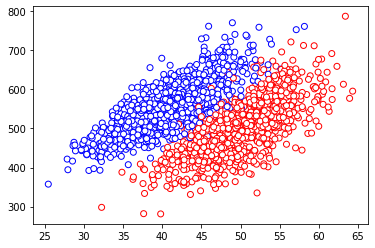

In [410]:
import matplotlib.pyplot as plt
plt.scatter(x, y, c='w', edgecolors=['r','b']) 

In [ ]:
z = np.polyfit(x,y,1)
p = np.poly1d(z)
print("Equação da Reta: ",p)

Equação da Reta:   
14 x - 119


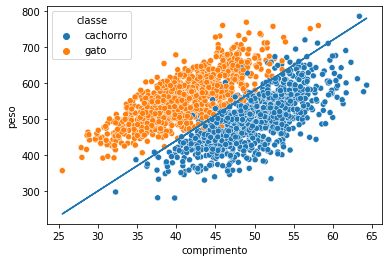

In [ ]:
import seaborn as sns
sns.scatterplot(data=dados, x='comprimento', y='peso', hue='classe')
y = 14*x -119
plt.plot(x,y)

In [395]:
#convertendo dados para formato numérico
dados['classe'] = dados['classe'].replace('cachorro', 0) 
dados['classe'] = dados['classe'].replace('gato', 1)
x_treino = dados.iloc[:,1:3].values # array comprimento+peso: Valores de treino, são as features do conjunto de dados
y_treino = dados.iloc[:,3].values # array 0 = cachorro, 1: Valores alvo (rótulos de classe na classificação)
y_treino # mostra array

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
!pip install scikit-plot

In [396]:
#criando modelo
from sklearn.svm import SVC
modelo = SVC() #modelo sem nenhum valor
modelo.fit(x_treino, y_treino) #treinando os dados x_treino (features), y_treino (rótulos)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [454]:
prev = modelo.predict(x_treino) #devolve o conjunto 
prev

array([0, 1, 0, ..., 1, 0, 1])

Acurácia: 0.9235


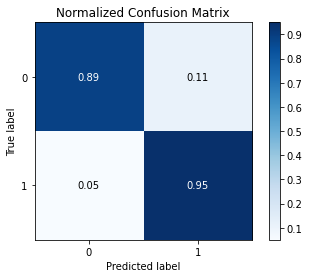

In [458]:
from sklearn import metrics
import scikitplot as skplt
print ('Acurácia:', metrics.accuracy_score(y_treino, prev))
skplt.metrics.plot_confusion_matrix(y_treino, prev, normalize=True)

In [460]:
print("Relatório de Classificação:\n",metrics.classification_report(y_treino,prev))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      1000
           1       0.90      0.95      0.93      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

